In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

In [140]:
df = pd.read_csv('cropped_Rat1 probe 4-day2-free_2019-05-13-114301-0000_reconstructed.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Select the first m rows and first n columns
m_s = 3000  # Example value for rows
m_end = 6000
n = 100   # Example value for columns
n_pose_data = 48
# n_pose_data = 0
df = df.iloc[m_s:m_end, n_pose_data:n+n_pose_data]
df.to_csv('dimensionality_reduction.csv')

In [128]:
# df = df[df.columns[-10:]]

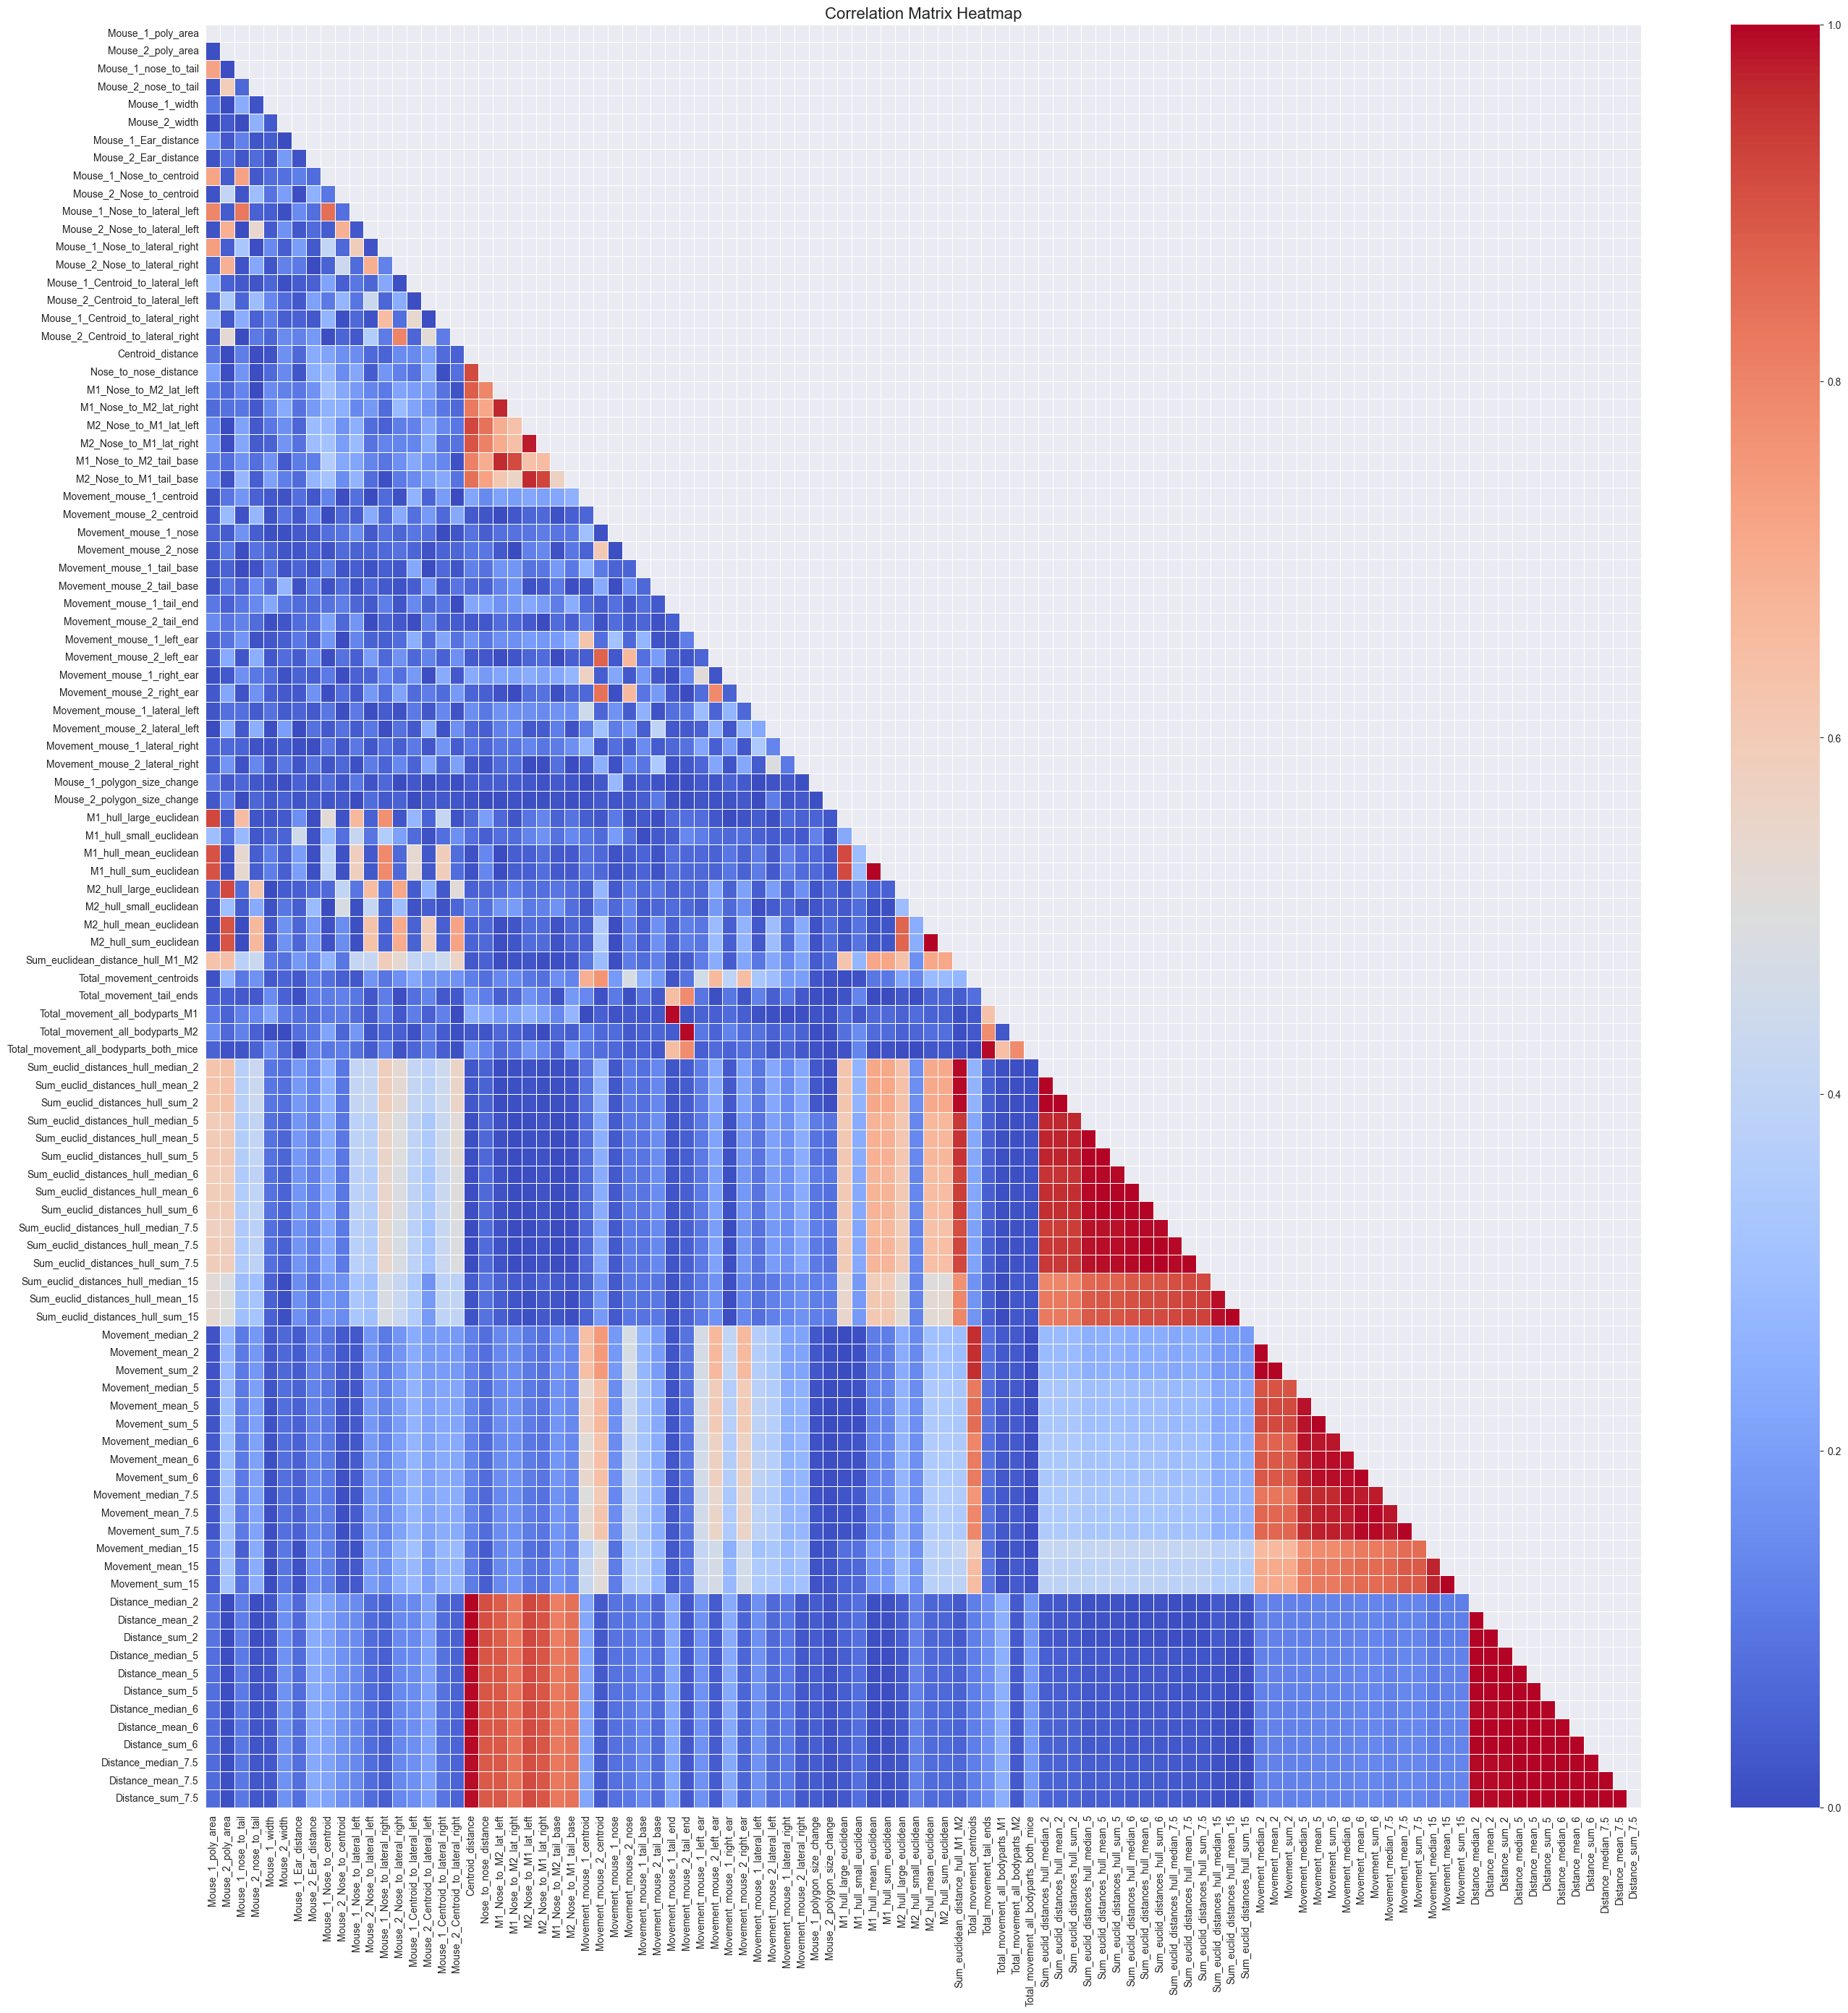

In [131]:
# Assuming your DataFrame is named df
# 1. Calculate the correlation matrix
corr_matrix = df.corr().abs()

# 2. Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Set up the matplotlib figure
plt.figure(figsize=(32, 32))

# 4. Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1, linewidths=.5)

# 5. Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [132]:
# Load a dataset
# digits = load_digits()
# X, y = digits.data, digits.target


In [133]:
X = df.values
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [136]:
# Helper function for plotting
def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# 1. Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that identifies the axes of maximum variance in high-dimensional data and projects the data onto a lower-dimensional subspace along those axes.
Key characteristics of PCA:
- Linear: It assumes linear relationships in the data.
- Unsupervised: It doesn't use target variables.
- Preserves global structure: It maintains the global structure of the data.
- Interpretable: Principal components can often be interpreted in terms of original features.


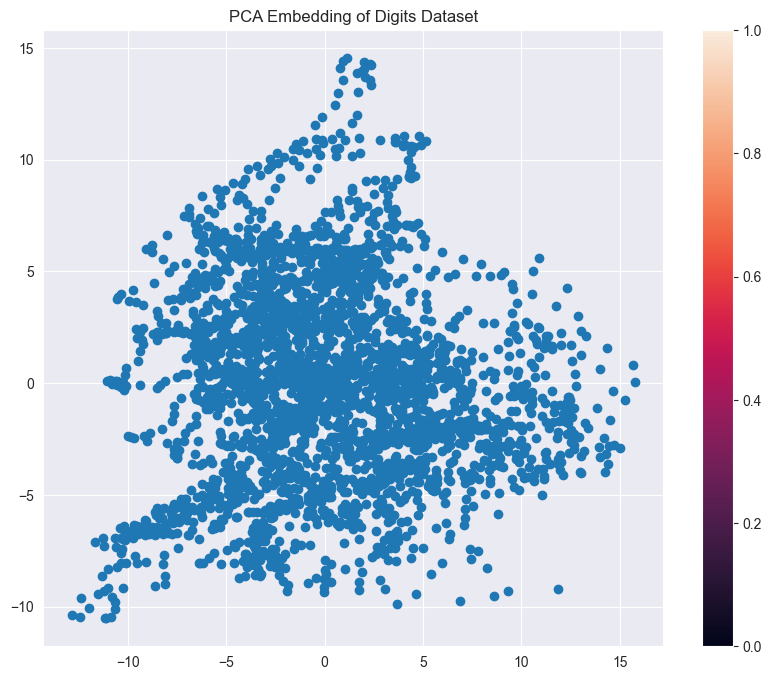


Variance explained by the first two principal components: 0.58


In [137]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plot_embedding(X_pca, None, "PCA Embedding of Digits Dataset")

print(f"\nVariance explained by the first two principal components: {pca.explained_variance_ratio_.sum():.2f}")


PCA Parameters:
1. n_components:
   - Effect: Determines the number of principal components to keep.
   - How to choose: 
     a) Use explained variance ratio: Select enough components to explain a certain percentage of variance (e.g., 95%).
     b) Elbow method: Plot explained variance vs. number of components and look for an elbow.
     c) Domain knowledge: Choose based on interpretability or visualization needs (e.g., 2 or 3 for plotting).
2. svd_solver:
   - Effect: Algorithm to compute the singular value decomposition.
   - How to choose:
     - 'auto': Let scikit-learn choose based on data size and n_components.
     - 'full': For small datasets or when you need all components.
     - 'randomized': For large datasets when you don't need all components.



Example of choosing n_components:
Number of components explaining 95% of variance: 27


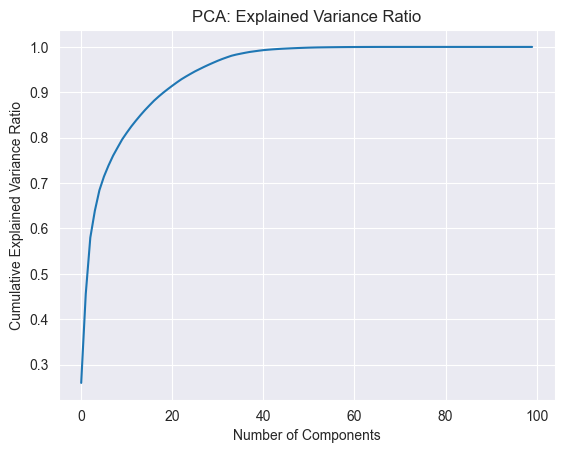

In [138]:
print("\nExample of choosing n_components:")
pca = PCA().fit(X_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.show()

# 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a nonlinear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.
Key characteristics of t-SNE:
- Nonlinear: Can capture complex, nonlinear relationships in the data.
- Stochastic: Results can vary between runs due to its probabilistic nature.
- Preserves local structure: Focuses on preserving the local structure of the data.
- Not interpretable: The dimensions in t-SNE space don't have clear meanings in terms of original features.


C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


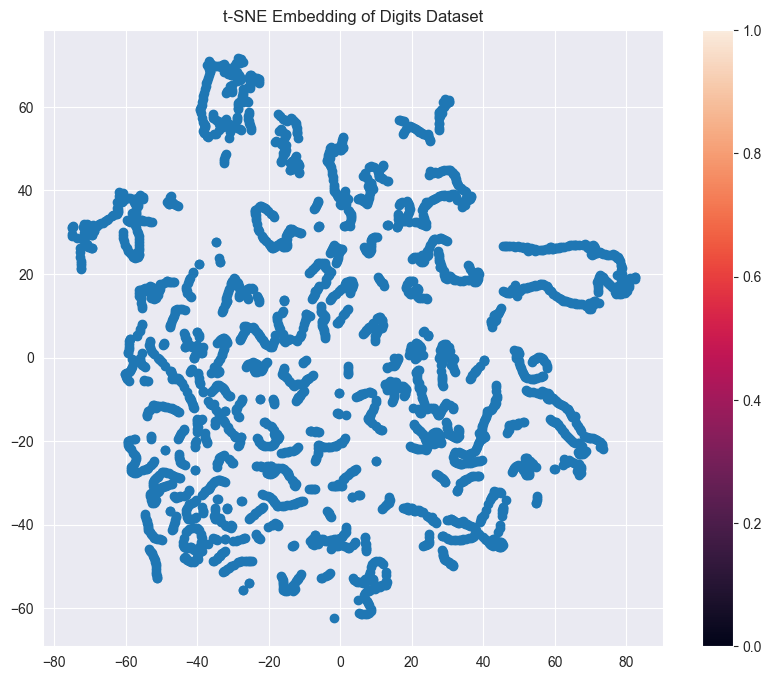

In [139]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plot_embedding(X_tsne, None, "t-SNE Embedding of Digits Dataset")


t-SNE Parameters:
1. perplexity:
   - Effect: Balance between preserving local and global structure. Affects the size of the local neighborhood.
   - How to choose: 
     - Typically, between 5 and 50. 
     - For smaller datasets, use smaller values (5-10).
     - For larger datasets, use larger values (30-50).
     - Experiment with different values and compare results.

2. n_iter:
   - Effect: Number of iterations for optimization.
   - How to choose:
     - Default is 1000, which is often sufficient.
     - Increase if the plot looks 'unfinished' or if the KL divergence is still decreasing.

3. learning_rate:
   - Effect: Step size for gradient descent.
   - How to choose:
     - Default is 200, which works well in most cases.
     - If the resulting plot looks like a 'ball', decrease it.
     - If the resulting plot looks like sparse clouds, increase it.

4. early_exaggeration:
   - Effect: How tight natural clusters are in the early stages of optimization.
   - How to choose:
     - Default is 12.0, which works well in most cases.
     - Increase for datasets with dense clusters.




Example of choosing perplexity:


C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\VAME\li

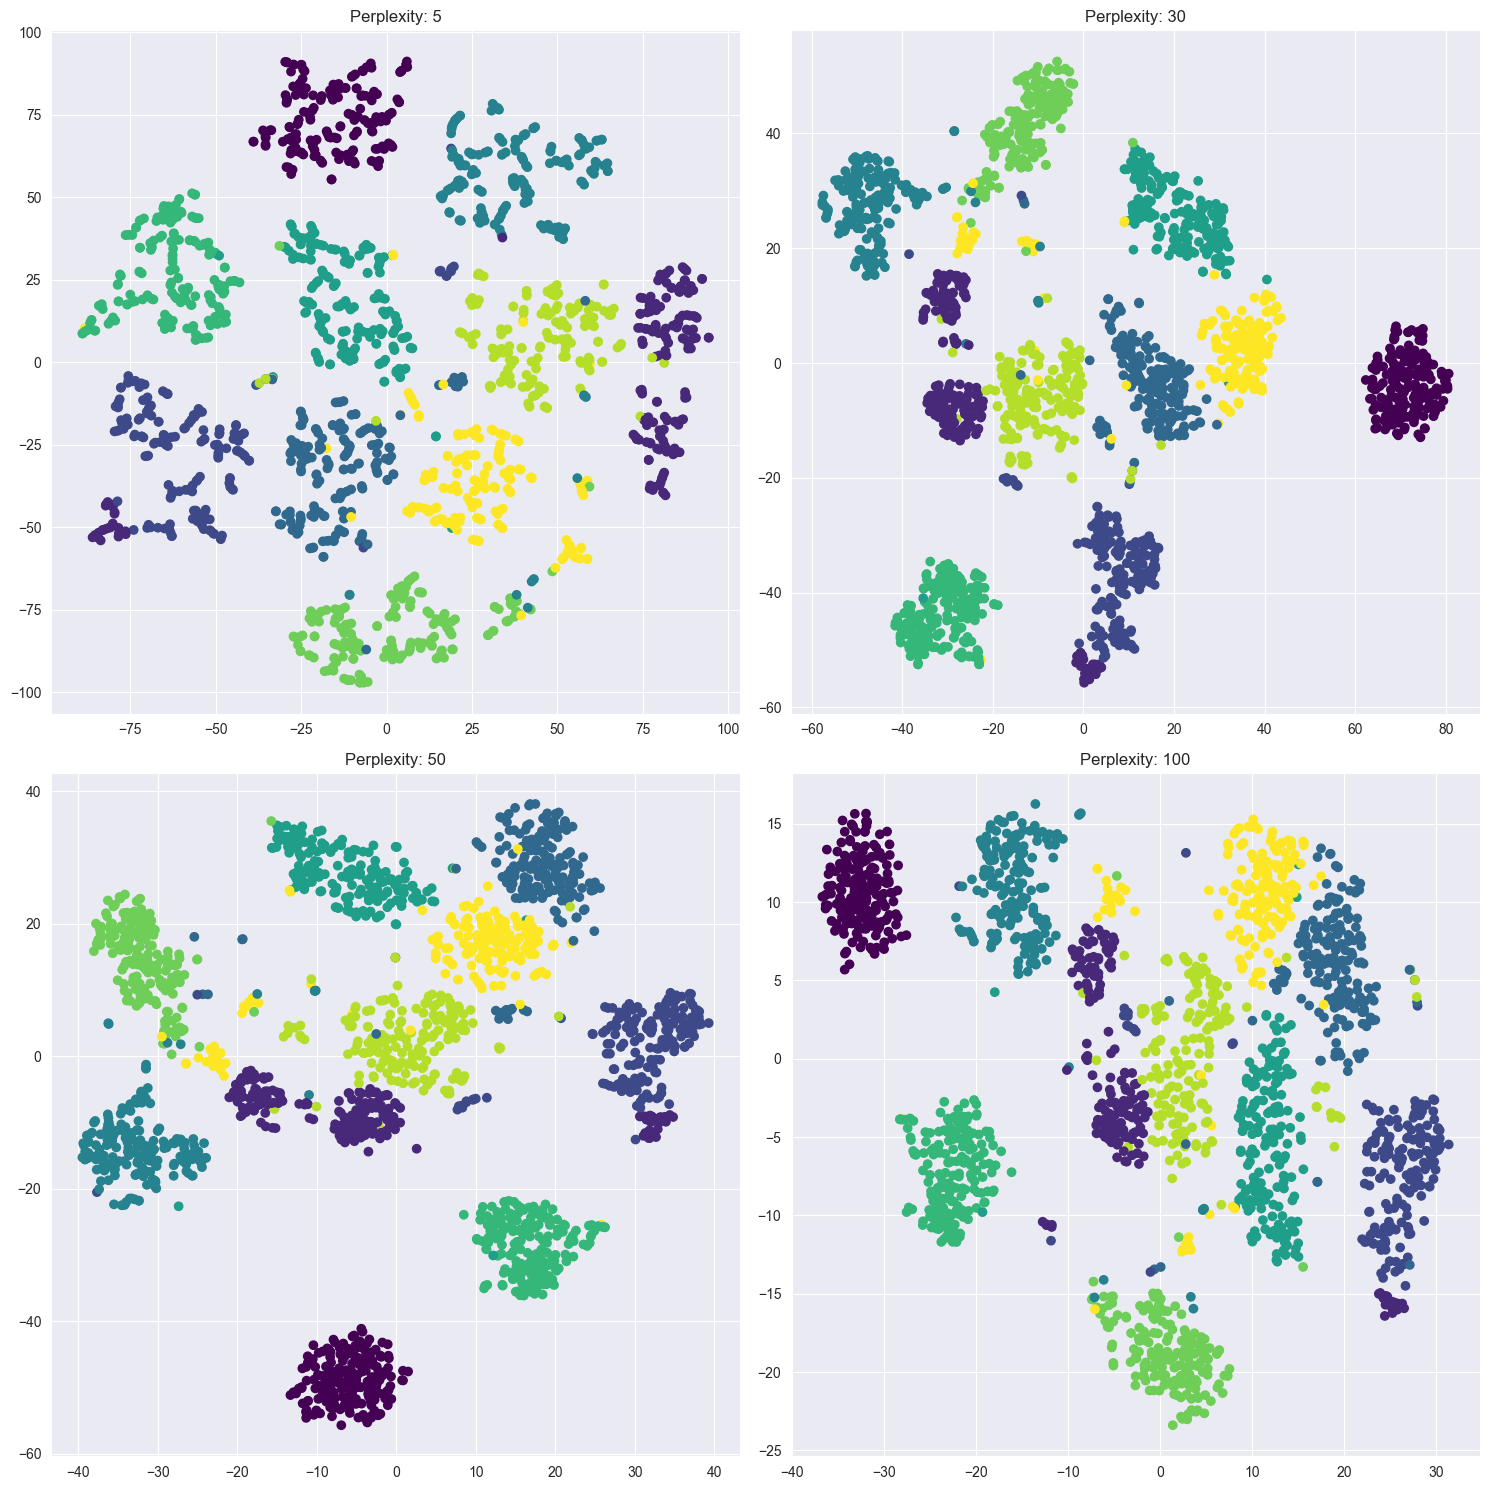

In [23]:
print("\nExample of choosing perplexity:")
perplexities = [5, 30, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, perplexity in enumerate(perplexities):
    ax = axes[i//2, i%2]
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_scaled)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    ax.set_title(f'Perplexity: {perplexity}')
plt.tight_layout()
plt.show()

# 3. Uniform Manifold Approximation and Projection (UMAP)

UMAP is a dimension reduction technique that can be used for visualization similarly to t-SNE, but also for general non-linear dimension reduction.")
Key characteristics of UMAP:
- Nonlinear: Can capture complex, nonlinear relationships in the data.
- Deterministic: Given the same hyperparameters and initialization, it produces the same result.
- Preserves both local and global structure: Attempts to balance local and global structure preservation.
- Faster than t-SNE: Especially for larger datasets.


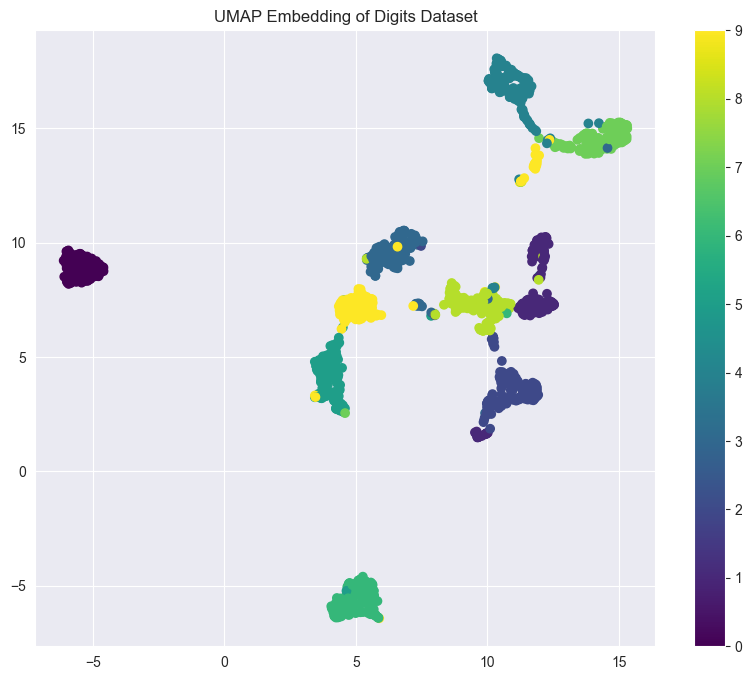

In [11]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plot_embedding(X_umap, y, "UMAP Embedding of Digits Dataset")


UMAP Parameters:
1. n_neighbors:
   - Effect: Controls how UMAP balances local versus global structure in the data.
   - How to choose:
     - Lower values (e.g., 5-15) preserve local structure but may fragment data.
     - Higher values (e.g., 30-100) preserve more global structure.
     - Start with the square root of the number of samples and adjust based on results.

2. min_dist:
   - Effect: Controls how tightly UMAP is allowed to pack points together.
   - How to choose:
     - Lower values (e.g., 0.0-0.2) result in tighter, more clustered embeddings.
     - Higher values (e.g., 0.5-0.8) result in more evenly dispersed embeddings.
     - Default is 0.1, which often works well.

3. n_components:
   - Effect: The dimension of the space to embed into.
   - How to choose:
     - For visualization, use 2 or 3.
     - For dimensionality reduction, you might use more, guided by downstream task requirements.

4. metric:
   - Effect: The metric used to compute distances in the ambient space.
   - How to choose:
     - For continuous data, 'euclidean' is often appropriate.
     - For binary data, 'hamming' or 'jaccard' might be more suitable.
     - For probabilistic data, 'hellinger' or 'cosine' could be considered.




Example of choosing n_neighbors and min_dist:


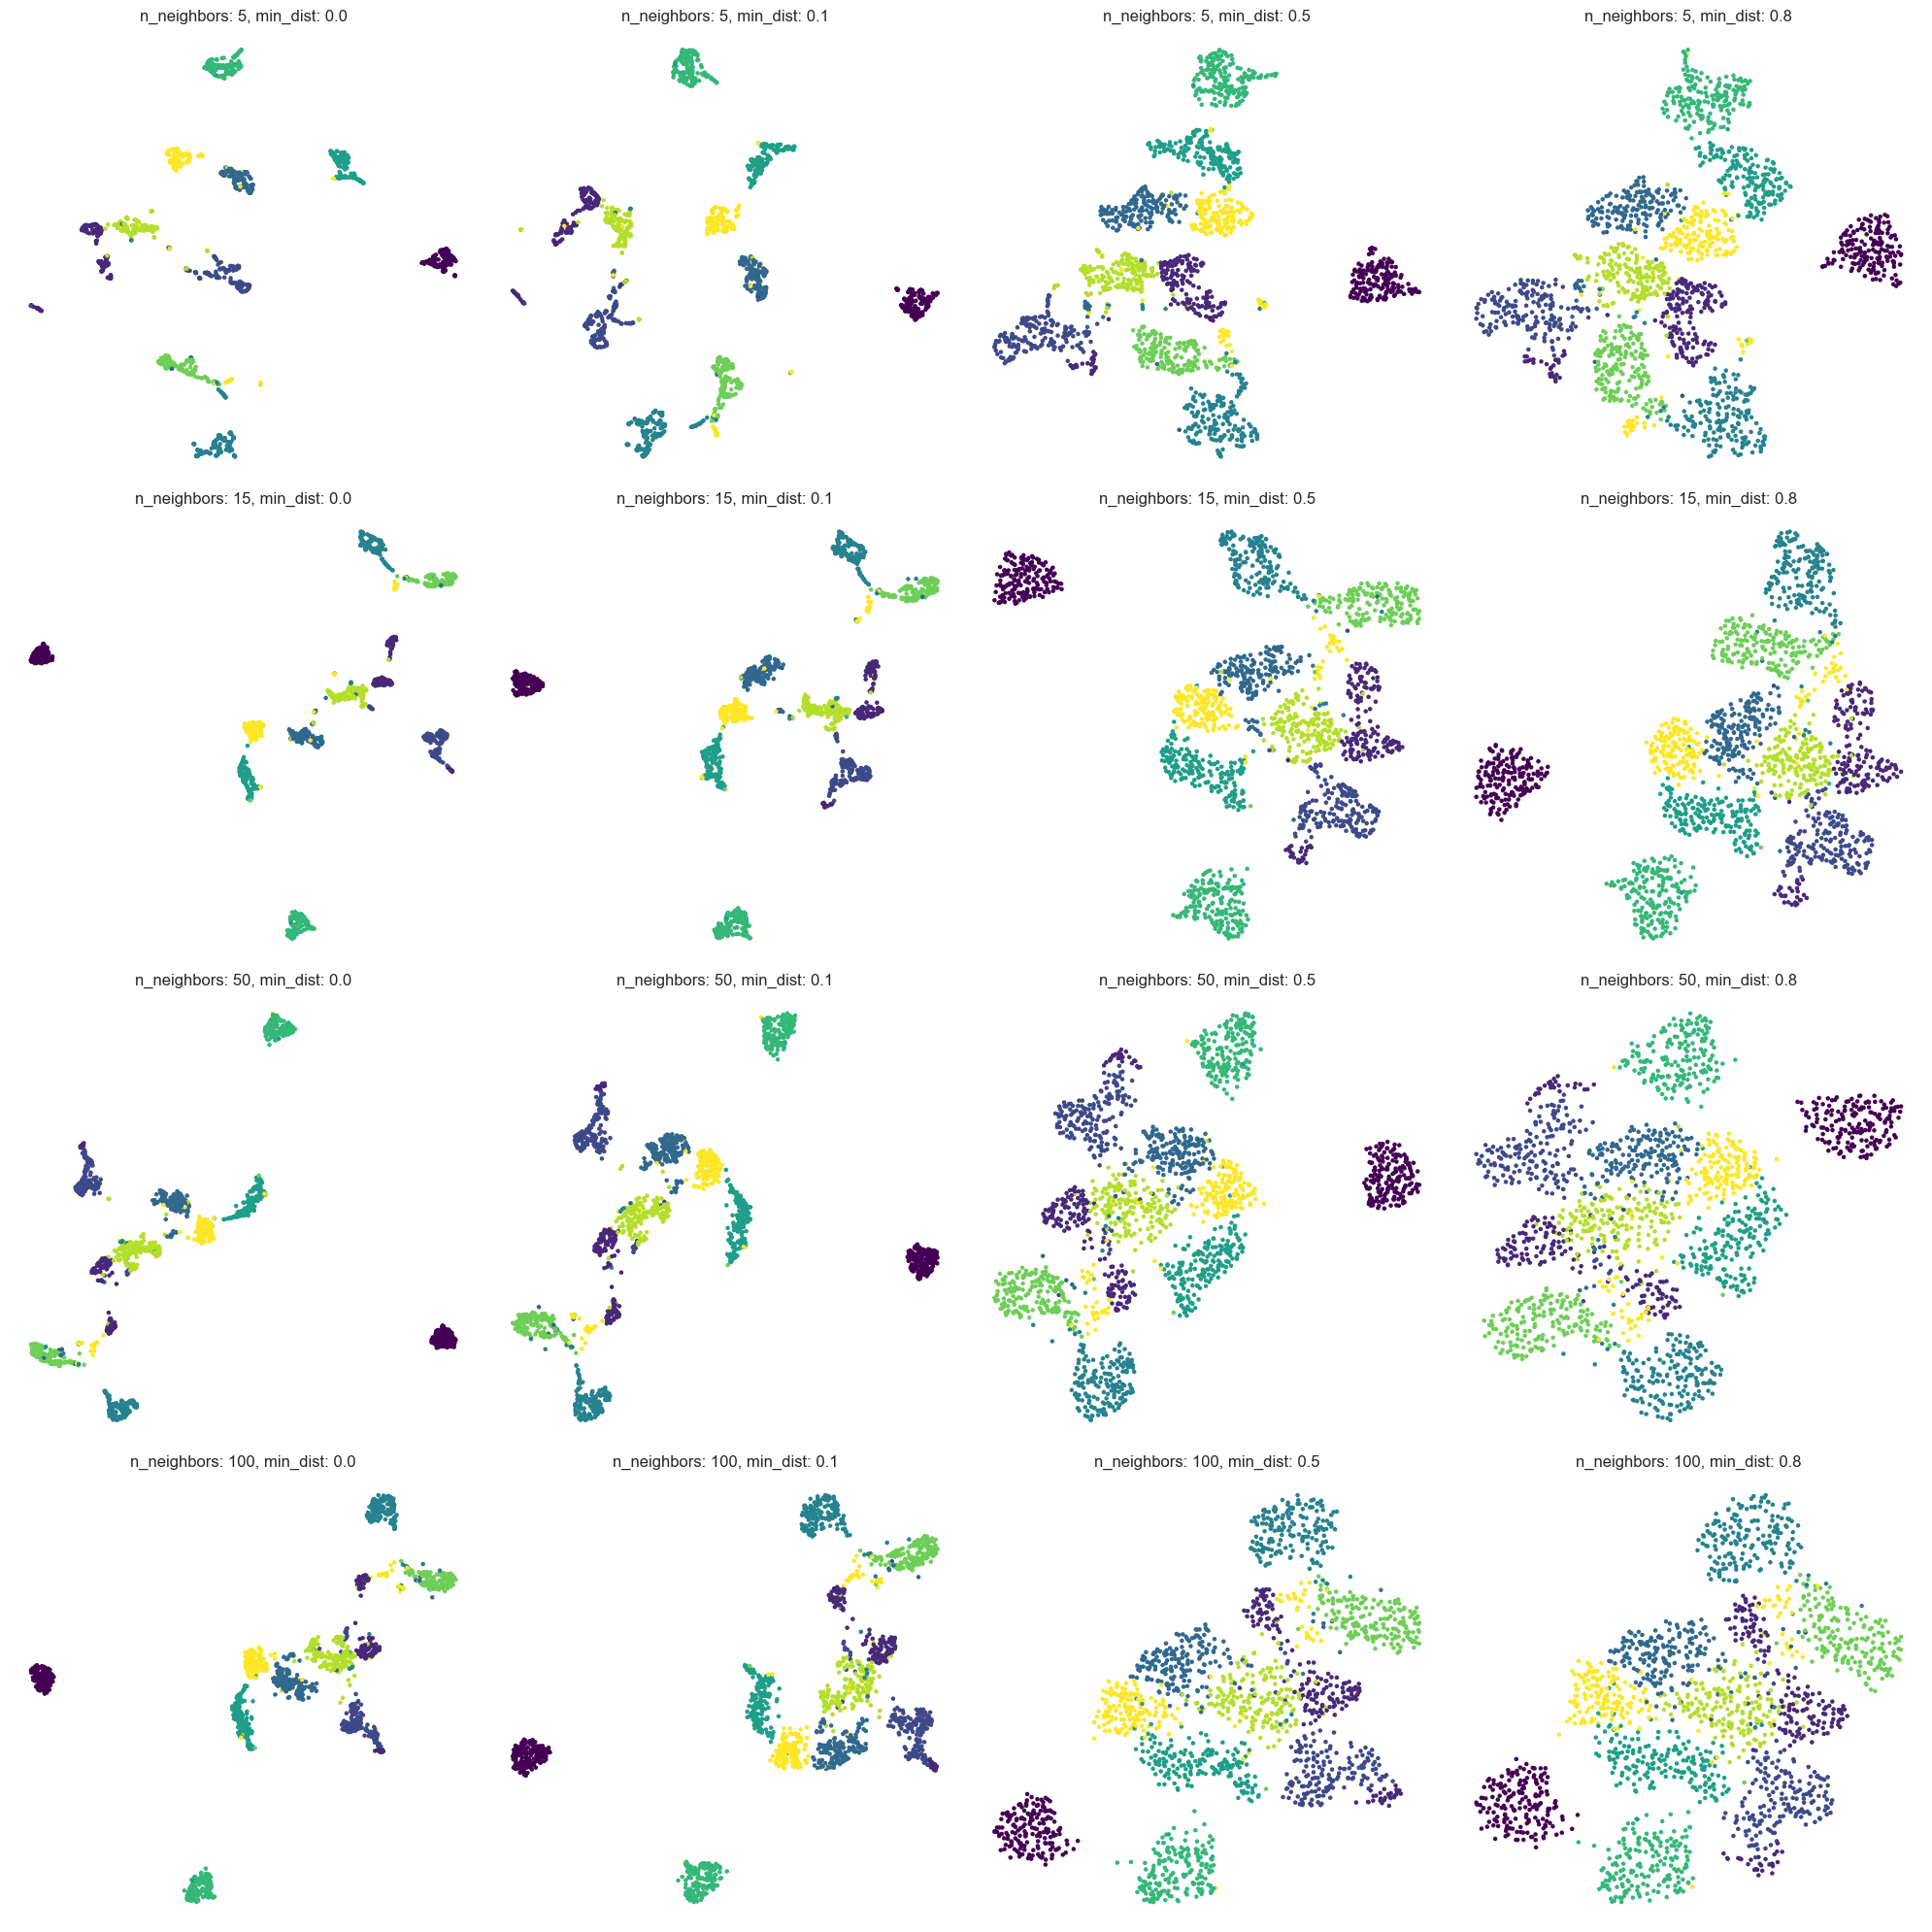

In [24]:
print("\nExample of choosing n_neighbors and min_dist:")
n_neighbors_list = [5, 15, 50, 100]
min_dist_list = [0.0, 0.1, 0.5, 0.8]

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, n_neighbors in enumerate(n_neighbors_list):
    for j, min_dist in enumerate(min_dist_list):
        ax = axes[i, j]
        umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap = umap_model.fit_transform(X_scaled)
        ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=5)
        ax.set_title(f'n_neighbors: {n_neighbors}, min_dist: {min_dist}')
        ax.axis('off')
plt.tight_layout()
plt.show()

Comparison of Methods:
1. PCA:
   - Pros: Fast, simple, interpretable. Good for initial dimensionality reduction.
   - Cons: Assumes linearity. May miss important nonlinear structure.
2. t-SNE:
   - Pros: Excellent at revealing clusters and preserving local structure.
   - Cons: Slow for large datasets. Stochastic results. Struggles with global structure.
3. UMAP:
   - Pros: Fast. Preserves both local and global structure. Often provides good separation of clusters.
   - Cons: Less widely used than t-SNE. Can be sensitive to hyperparameters.

Choosing a Method:
- Use PCA when you need interpretability or a linear projection of the data.
- Use t-SNE for visualizing high-dimensional data, especially when local structure is important.
- Use UMAP as a faster alternative to t-SNE, especially for larger datasets, or when you want to preserve more of the global structure.
Remember: Always validate your results and consider using multiple methods to get a comprehensive view of your data's structure.

# Bonus: Comparing original and reduced dimensions

In [13]:
def plot_digit(data, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(data.reshape(8, 8), cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()


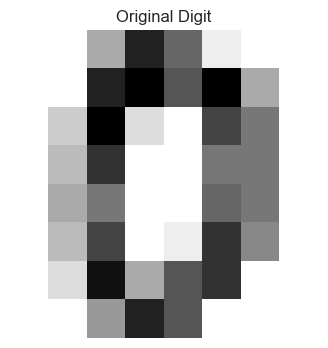

In [14]:
original_digit = X[0]
plot_digit(original_digit, "Original Digit")


Reconstruction from PCA:
Note: t-SNE and UMAP are not reversible, so we can't reconstruct the original data from their embeddings.
This highlights a key difference: PCA allows for dimensionality reduction while retaining the ability to approximately reconstruct the original data, which can be valuable in certain applications.

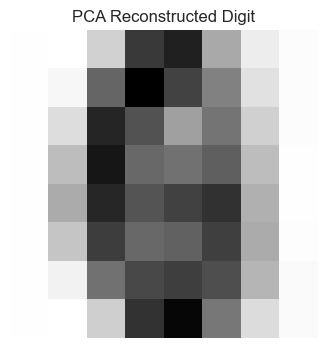

In [16]:
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)
X_reconstructed = pca_full.inverse_transform(X_pca_full)
reconstructed_digit = scaler.inverse_transform(X_reconstructed)[0]
plot_digit(reconstructed_digit, "PCA Reconstructed Digit")


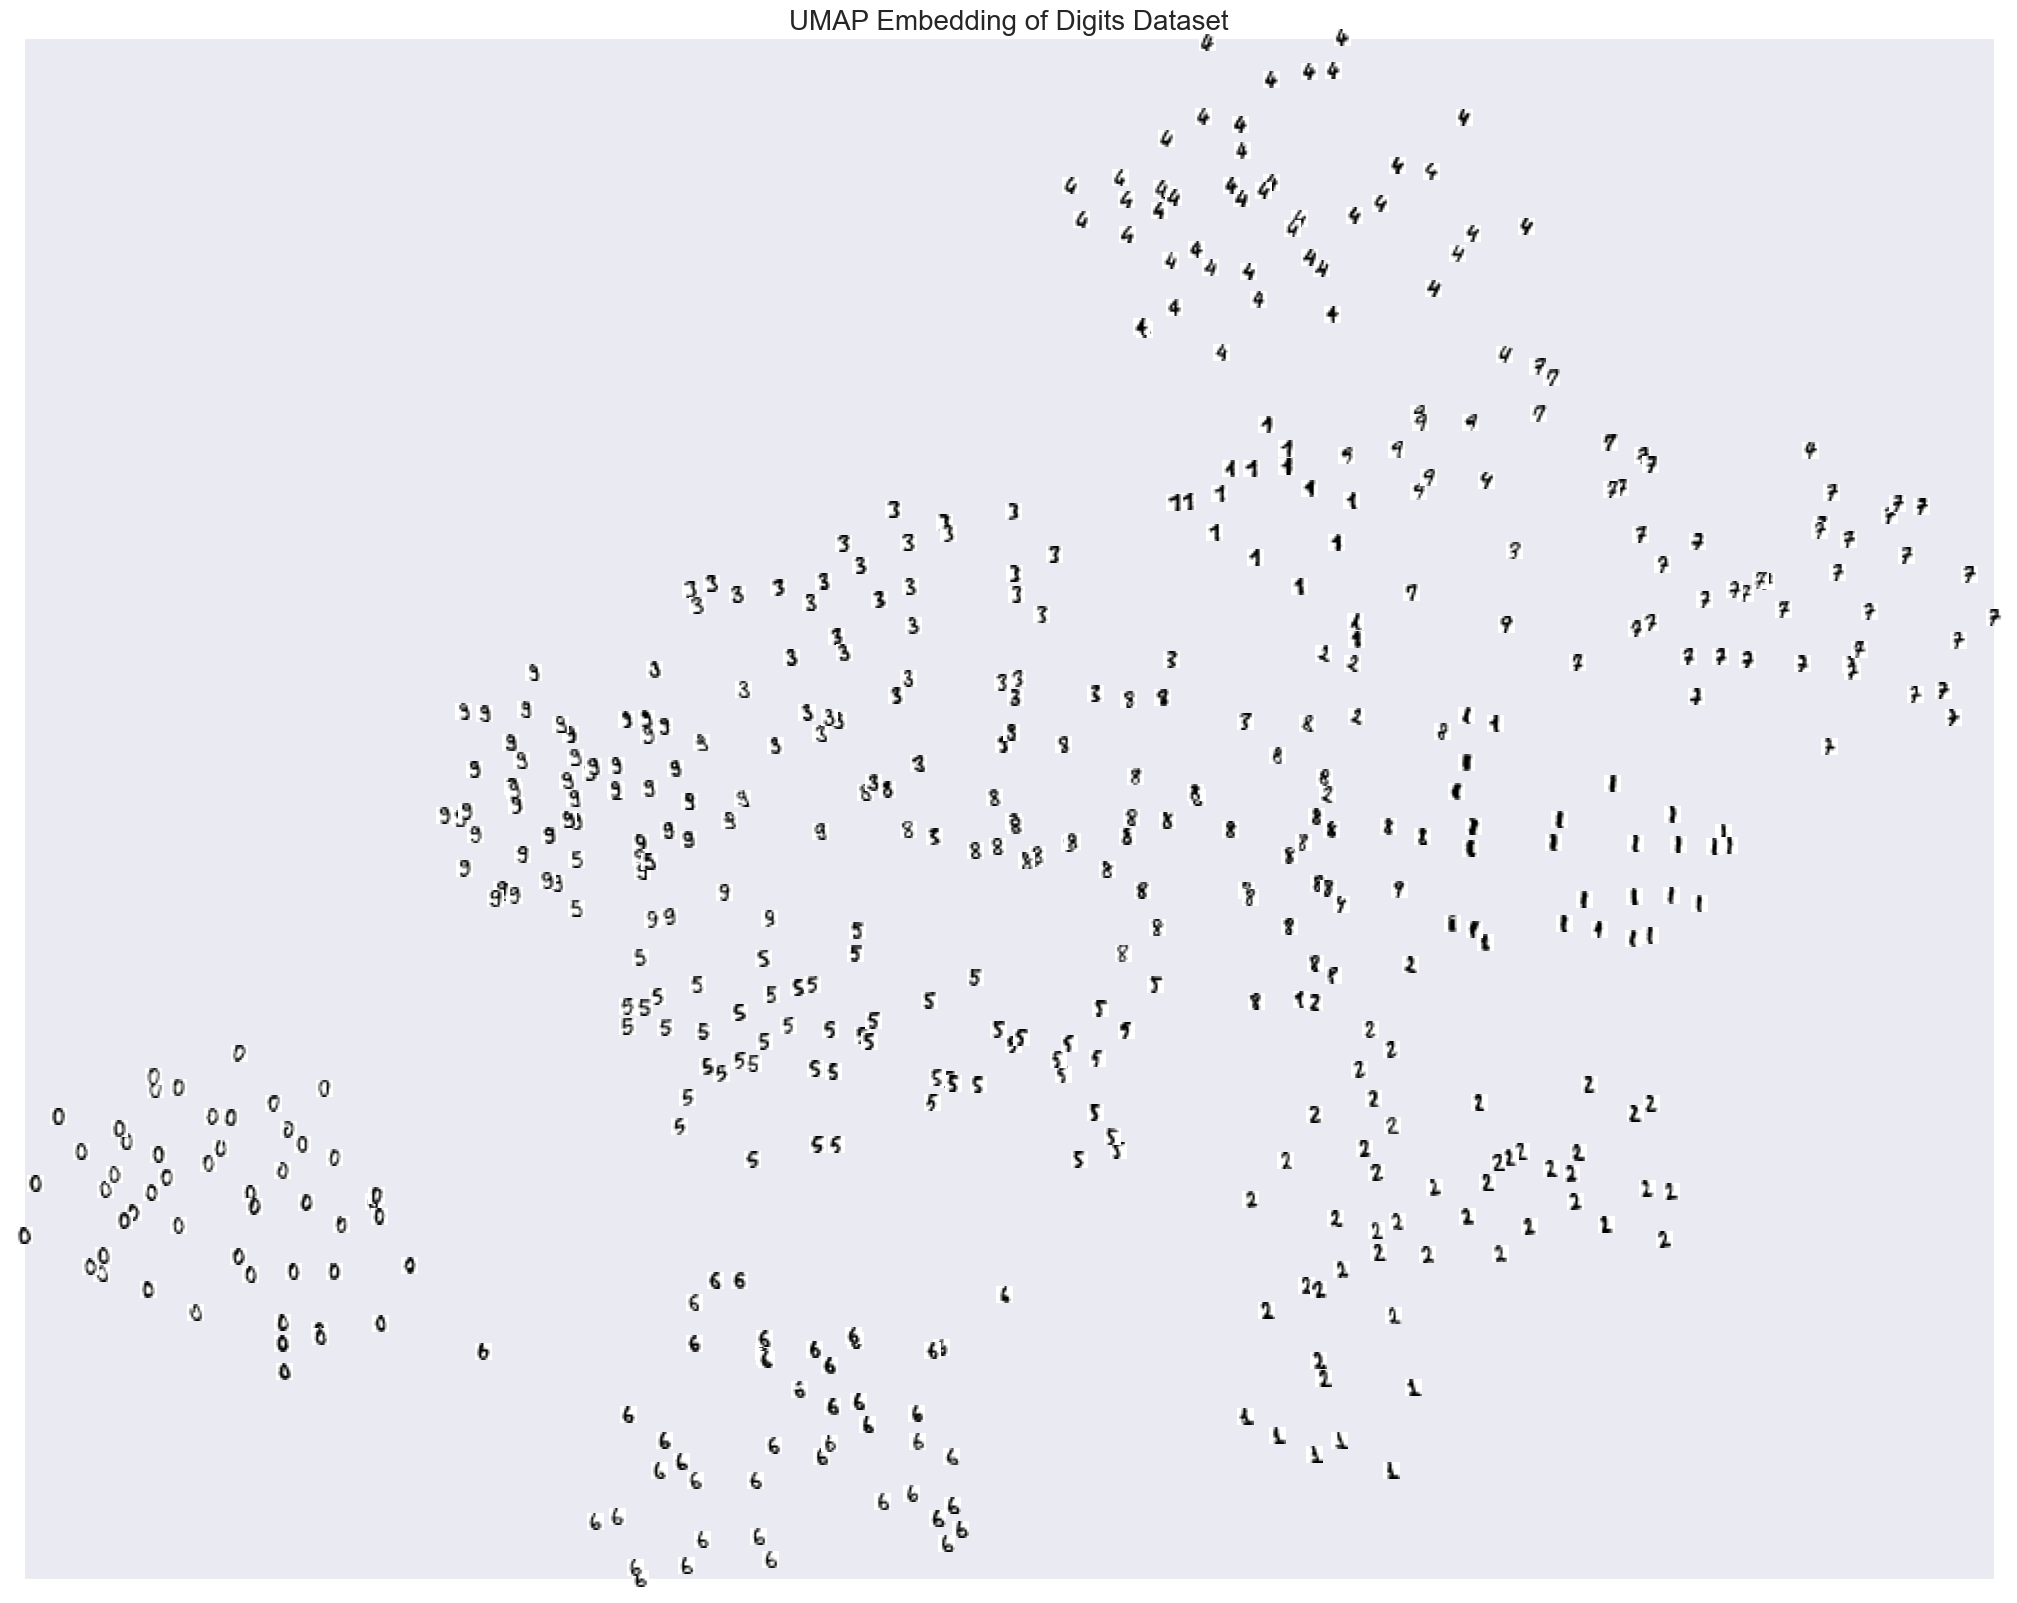

In [25]:
def plot_digits_embedding(X_embedded, X_original, y, title, sample_size=500):
    # Subsample the data
    if len(X_embedded) > sample_size:
        idx = np.random.choice(len(X_embedded), sample_size, replace=False)
        X_embedded = X_embedded[idx]
        X_original = X_original[idx]
        y = y[idx]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Plot each digit
    for i, (x, y_) in enumerate(X_embedded):
        digit = X_original[i].reshape(8, 8)
        img = OffsetImage(digit, cmap='gray_r', zoom=1.5)
        ab = AnnotationBbox(img, (x, y_), xycoords='data', frameon=False)
        ax.add_artist(ab)
    
    # Set the limits and remove ticks
    ax.set_xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max())
    ax.set_ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max())
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set title
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_digits_embedding(X_pca, X, y, "PCA Embedding of Digits Dataset")
# plot_digits_embedding(X_tsne, X, y, "t-SNE Embedding of Digits Dataset")
plot_digits_embedding(X_umap, X, y, "UMAP Embedding of Digits Dataset")

Visit the following website to play around with the parameters to see their affect
https://projector.tensorflow.org/